In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import f_oneway


In [31]:
#Carregando dataset
data = pd.read_excel("hoteis_tratados.xlsx")
data.columns = data.columns.str.lower()
data

,data_avaliacao,titulo,comentario_positivo,comentario_negativo,nota,hotel
0,2025-02-17,bom,A localização é perfeita e os funcionários são...,Da área de lazer que é pequena e sem uma vista...,10.0,Atlante_Plaza
1,2025-03-30,Pretenso vir oitras vezes,Atrndimento e conforto,Estacionamento pago,10.0,Atlante_Plaza
2,2025-03-29,Excepcional,"Foi excelente!! Tudo muito bom, os funcionário...",NaN,10.0,Atlante_Plaza
3,2025-03-29,Quero voltar!,"Funcionários bem treinados. Agradecemos, espec...",NaN,9.0,Atlante_Plaza
4,2025-03-27,Incrível,Excelente,NaN,10.0,Atlante_Plaza
...,...,...,...,...,...,...
72439,2024-12-28,Excepcional,NaN,NaN,10.0,Vela_Branca
72440,2024-08-14,Aceitável,NaN,NaN,5.0,Vela_Branca
72441,2024-04-12,Aceitável,NaN,NaN,5.0,Vela_Branca
72442,2024-03-26,Excepcional,NaN,NaN,10.0,Vela_Branca


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72444 entries, 0 to 72443
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_avaliacao       72444 non-null  datetime64[ns]
 1   titulo               72444 non-null  object        
 2   comentario_positivo  34665 non-null  object        
 3   comentario_negativo  29024 non-null  object        
 4   nota                 72444 non-null  float64       
 5   hotel                72444 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.3+ MB


In [33]:
data['nota'].unique()


array([10. ,  9. ,  7. ,  8. ,  5. ,  4. ,  6. ,  3. ,  1. ,  2. ,  5.8,
        8.3,  6.3,  6.7,  9.2,  9.6])

In [34]:
data['nota'].nunique()


16

C:\Users\TERRA\AppData\Local\Temp\ipykernel_20812\1787070358.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nota_hotel, x='nota', y='hotel', palette='viridis')


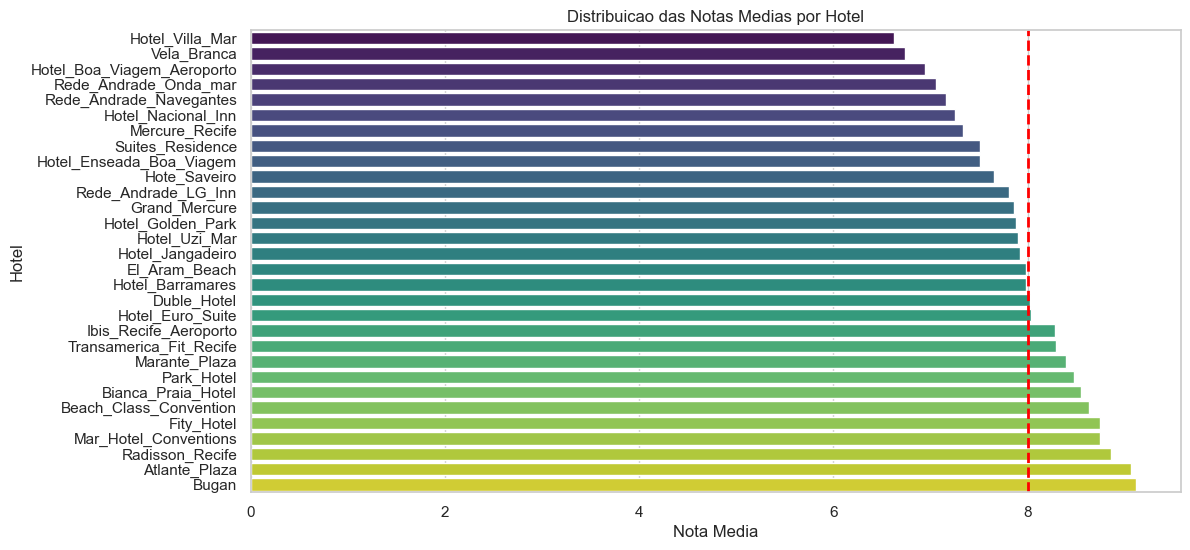

In [35]:
# Nota media por hotel
nota_hotel = data.groupby('hotel')['nota'].mean().sort_values().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=nota_hotel, x='nota', y='hotel', palette='viridis')
plt.axvline(x=8, color='red', linestyle='--', linewidth=2)
plt.title('Distribuicao das Notas Medias por Hotel')
plt.xlabel('Nota Media')
plt.ylabel('Hotel')
plt.show()

In [36]:
# Quantos hoteis estao abaixo da nota 8?
hoteis_menor = nota_hotel[nota_hotel['nota'] < 8]
porcentagem = (hoteis_menor.shape[0] / nota_hotel.shape[0]) * 100
print(f"{porcentagem:.2f}%")

56.67%


# Em uma escala de 0 a 10, mais de 56% dos hotéis avaliados apresentam desempenho abaixo de 8, o que pode indicar uma experiência apenas satisfatória para a maioria dos hóspedes.

C:\Users\TERRA\AppData\Local\Temp\ipykernel_20812\2912609811.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=positivo_hotel, x='comentario_positivo', y='hotel', palette='viridis')


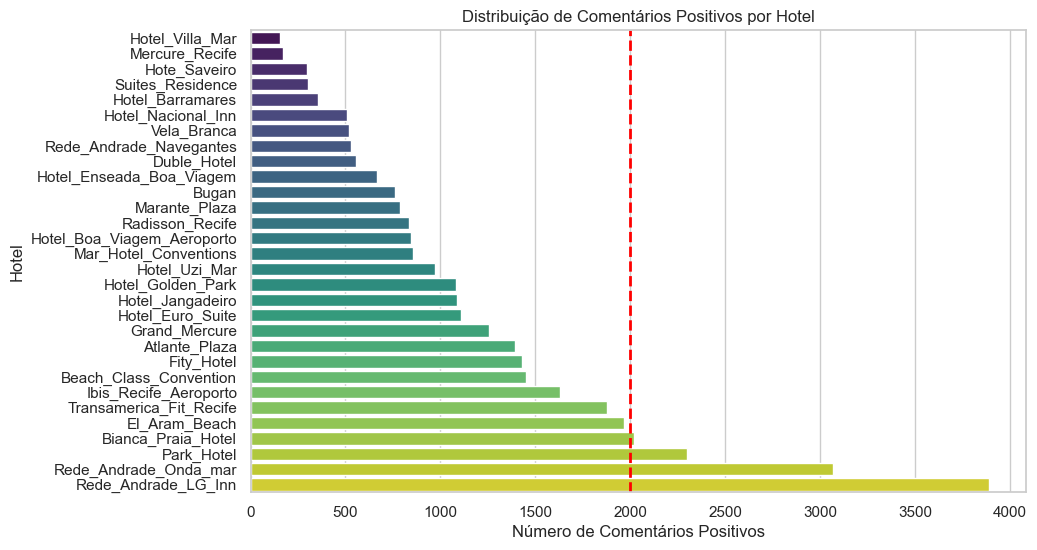

In [37]:
positivo_hotel = data.groupby('hotel')['comentario_positivo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=positivo_hotel, x='comentario_positivo', y='hotel', palette='viridis')
plt.axvline(x=2000, color='red', linestyle='--', linewidth=2)
plt.title('Distribuição de Comentários Positivos por Hotel')
plt.xlabel('Número de Comentários Positivos')
plt.ylabel('Hotel')
plt.show()

# Linha vertical vermelha, pontilhada, na posição x = 2000
# analise o fato de que poucos foram os hoteis que obtiveram mais de 2000 comentarios positivos
# e que a maioria dos hoteis tem menos de 2000 comentarios positivos

# depois tente fazer uma correlaçõa entre QUANTIDADE DE COMENTARIOS e NOTA MEDIA para ver se existe 
# uma correlação entre o fato de ter uma nota média maior estimula mais comentários positivos



# Polarização: hotéis com mais visibilidade recebem mais opiniões de todos os tipos.

C:\Users\TERRA\AppData\Local\Temp\ipykernel_20812\2571723629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negativo_hotel, x='comentario_negativo', y='hotel', palette='viridis')


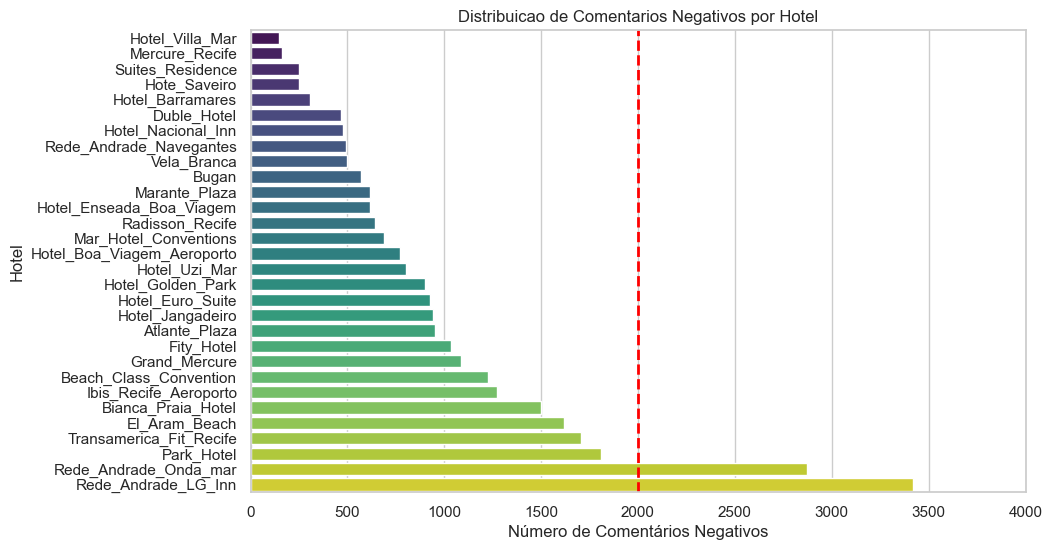

In [38]:
negativo_hotel = data.groupby('hotel')['comentario_negativo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=negativo_hotel, x='comentario_negativo', y='hotel', palette='viridis')
plt.title('Distribuicao de Comentarios Negativos por Hotel')
plt.xlim(0, 4000)
plt.axvline(x=2000, color='red', linestyle='--', linewidth=2)
plt.xlabel('Número de Comentários Negativos')
plt.ylabel('Hotel')
plt.show()




# Analisando esse gráfico vemos que os mesmos 2 hoteis que tiveram mais comentarios POSITIVOS também tiveram mais comentarios NEGATIVOS
# o que isso significa?

# Polarização: hotéis com mais visibilidade recebem mais opiniões de todos os tipos.

# Análise de Correlação:

- Conceito de Correlação: A correlação é um conceito estatístico utilizado para medir o grau de associação entre duas variáveis. Em outras palavras, a correlação indica o quanto uma variável se altera em função da variação da outra. Quando duas variáveis aumentam ou diminuem juntas, diz-se que possuem uma correlação positiva. Quando uma variável aumenta enquanto a outra diminui, a correlação é considerada negativa. Por fim, se não existe uma relação sistemática entre as variações das variáveis, a correlação é nula. É fundamental destacar que correlação não implica necessariamente causalidade.

- O Coeficiente de Correlação de Pearson é uma medida estatística que avalia a intensidade e a direção da relação linear entre duas variáveis numéricas contínuas. Essa medida varia entre -1 e +1. Um coeficiente igual a +1 indica correlação positiva perfeita; 0 indica ausência de correlação; e -1 indica correlação negativa perfeita. Além disso, o valor-p é utilizado para determinar a significância estatística da correlação. Valores-p inferiores a 0,05 indicam que a correlação é estatisticamente significativa.

| Coeficiente (r) | Interpretação         |
|-----------------|------------------------|
| 0,9 a 1,0       | Correlação muito forte  |
| 0,7 a 0,9       | Correlação forte        |
| 0,5 a 0,7       | Correlação moderada     |
| 0,3 a 0,5       | Correlação fraca        |
| 0,0 a 0,3       | Correlação muito fraca  |

In [39]:
# Fazer o merge do df de "notas médias" com os de comentários positivos e negativos
# para ver se existe alguma correlação entre a quantidade de comentarios e a nota média

htl_nota_pos_neg = nota_hotel.merge(positivo_hotel, on='hotel', how='left').merge(negativo_hotel, on='hotel', how='left')
htl_nota_pos_neg

,hotel,nota,comentario_positivo,comentario_negativo
0,Hotel_Villa_Mar,6.619938,157,146
1,Vela_Branca,6.734131,517,497
2,Hotel_Boa_Viagem_Aeroporto,6.944288,847,772
3,Rede_Andrade_Onda_mar,7.054579,3066,2872
4,Rede_Andrade_Navegantes,7.160494,529,491
5,Hotel_Nacional_Inn,7.253390,507,477
6,Mercure_Recife,7.335211,170,163
7,Suites_Residence,7.506512,304,250
8,Hotel_Enseada_Boa_Viagem,7.510453,665,618
9,Hote_Saveiro,7.654206,299,252


In [40]:
# Cálculo da correlação de Pearson:

corr_pos, p_pos = pearsonr(htl_nota_pos_neg['nota'], htl_nota_pos_neg['comentario_positivo'])
corr_pos, p_pos

(np.float64(0.22095103843731342), np.float64(0.24065687034697913))

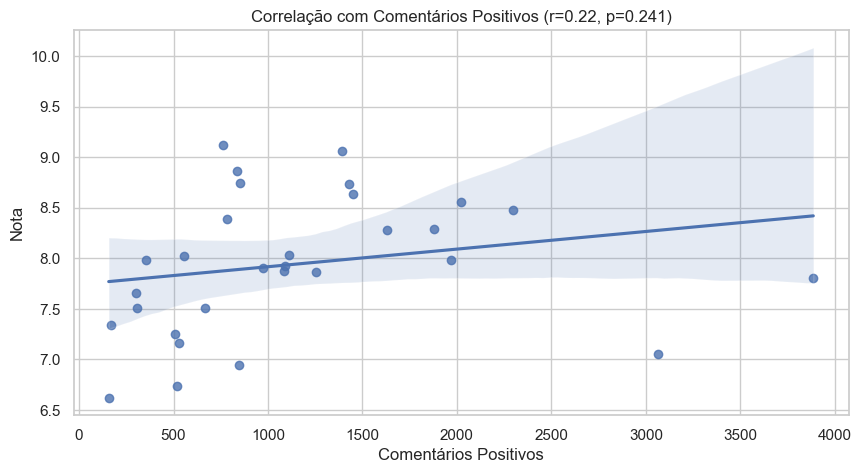

In [41]:
# Visualização correlação entre nota média e quantidade de comentários POSITIVOS
plt.figure(figsize=(10, 5))
sns.regplot(x='comentario_positivo', y='nota', data=htl_nota_pos_neg)
plt.title(f'Correlação com Comentários Positivos (r={corr_pos:.2f}, p={p_pos:.3f})')
plt.xlabel('Comentários Positivos')
plt.ylabel('Nota')
plt.show()


Correlação entre nota e número de comentários positivos foram os seguintes resultados:
- Coeficiente de correlação (r) = 0.22
- Valor-p = 0.24

In [42]:
corr_neg, p_neg = pearsonr(htl_nota_pos_neg['nota'], htl_nota_pos_neg['comentario_negativo'])
corr_neg, p_neg


(np.float64(0.12611511947739076), np.float64(0.5066462973608473))

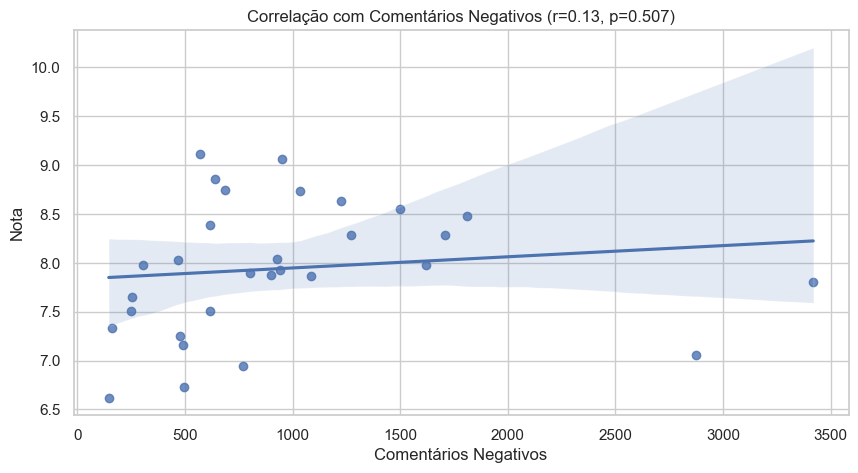

In [43]:
# Visualização da correlação entre nota média e quantidade de comentários NEGATIVOS
plt.figure(figsize=(10, 5))
sns.regplot(x='comentario_negativo', y='nota', data=htl_nota_pos_neg)
plt.title(f'Correlação com Comentários Negativos (r={corr_neg:.2f}, p={p_neg:.3f})')
plt.xlabel('Comentários Negativos')
plt.ylabel('Nota')
plt.show()

## Conclusão sobre a análise de correlação:

Apesar de se observar uma leve tendência positiva, os resultados indicam que não há uma correlação estatisticamente significativa (p > 0,05) entre o número de comentários — positivos ou negativos — e a nota média dos hotéis. Portanto, não há evidências suficientes para afirmar que existe uma relação linear entre a nota média e o número de comentários positivos. Assim, com base nos dados analisados, não se pode concluir que hotéis com maiores notas médias tendem a receber um maior número de comentários positivos.



# ANOVA

A ANOVA (Análise de Variância) de um fator permite verificar se a "média das notas" varia significativamente entre as "categorias". 
A Análise de Variância de um Fator é uma técnica estatística utilizada para comparar as médias de três ou mais grupos independentes e verificar se existe uma diferença estatisticamente significativa entre essas médias.

O resultado da ANOVA é avaliado por meio de duas medidas principais:
- Estatística F, que indica a razão entre a variância entre os grupos e a variância dentro dos grupos.
- Valor-p, que indica a significância estatística da diferença observada. Um valor-p inferior a 0,05 sugere que há diferenças significativas entre as médias de pelo menos dois dos grupos comparados.


In [44]:
categorias = pd.read_excel("hoteis_categorias.xlsx")

# Realizando o merge
nota_categoria = nota_hotel.merge(categorias, on='hotel', how='left')

In [45]:
# Separar as notas de acordo com a quantidade de estrelas
grupo_2_estrelas = nota_categoria[nota_categoria['categoria'] == 2]['nota']
grupo_3_estrelas = nota_categoria[nota_categoria['categoria'] == 3]['nota']
grupo_4_estrelas = nota_categoria[nota_categoria['categoria'] == 4]['nota']
grupo_5_estrelas = nota_categoria[nota_categoria['categoria'] == 5]['nota']


# Aplicar ANOVA
anova_resultado = f_oneway(grupo_2_estrelas, grupo_3_estrelas, grupo_4_estrelas, grupo_5_estrelas)

# Mostrar o resultado
print(f"Estatística F: {anova_resultado.statistic:.3f}")
print(f"Valor-p: {anova_resultado.pvalue:.5f}")



Estatística F: 3.223
Valor-p: 0.03891


C:\Users\TERRA\AppData\Local\Temp\ipykernel_20812\495703675.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categoria', y='nota', data=nota_categoria, palette='pastel')


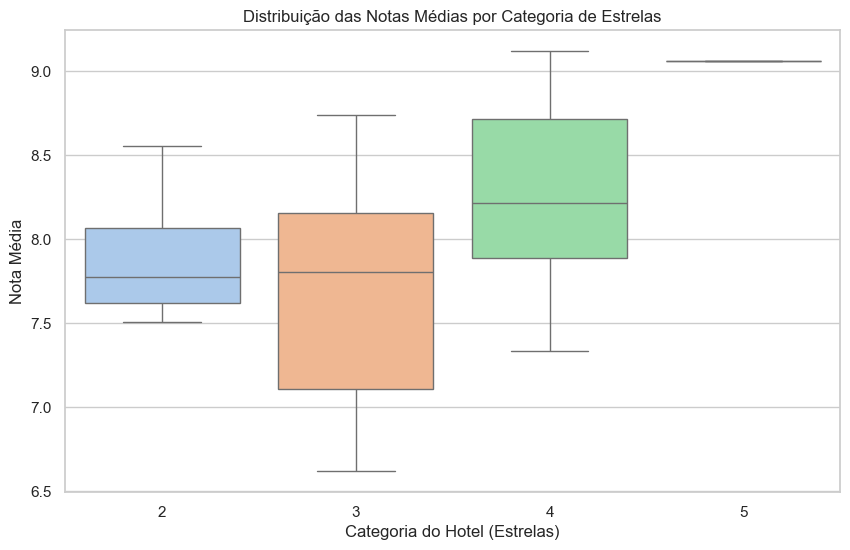

In [46]:
# Ajustar estilo do gráfico
sns.set(style="whitegrid")

# Criar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='categoria', y='nota', data=nota_categoria, palette='pastel')

# Título e eixos
plt.title('Distribuição das Notas Médias por Categoria de Estrelas')
plt.xlabel('Categoria do Hotel (Estrelas)')
plt.ylabel('Nota Média')

# Exibir
plt.show()


- A análise de variância de um fator indicou que a classificação dos hotéis com base no número de estrelas está associada a diferenças significativas nas notas médias atribuídas pelos usuários. O valor-p obtido (p = 0,03891) foi inferior ao nível de significância adotado (α = 0,05), permitindo rejeitar a hipótese nula de igualdade entre as médias dos grupos. Assim, conclui-se que a avaliação dos hóspedes tende a variar conforme a categoria do hotel, o que sugere que a classificação por estrelas pode influenciar a percepção de qualidade por parte dos avaliadores.

- A mediana de cada grupo, representada pela linha horizontal no interior de cada caixa no gráfico boxplot, constitui uma medida estatística das avaliações dentro de cada categoria de hotel. Ao analisar o comportamento dessas medianas, observa-se que os valores tendem a aumentar a medida que cresce o número de estrelas atribuídas aos hotéis. Os hotéis classificados com duas estrelas apresentam a menor mediana entre os grupos analisados, enquanto aqueles com cinco estrelas exibem a mediana mais elevada, o que sugere uma valorização crescente nas avaliações conforme a categoria do estabelecimento se eleva. As categorias para hotéis de três e quatro estrelas, também demonstram um aumento progressivo nas medianas, indicando uma possível relação positiva entre a classificação por estrelas e a percepção de qualidade por parte dos avaliadores. O padrão observado reforça os resultados obtidos pela análise de variância de um fator, que indicou diferenças estatisticamente significativas entre os grupos. Onde os hotéis com maior classificação tendem a receber avaliações superiores.


In [47]:
#Filtros
notas_baixas = data[data['nota'] < 8]
notas_altas = data[data['nota'] >= 8]

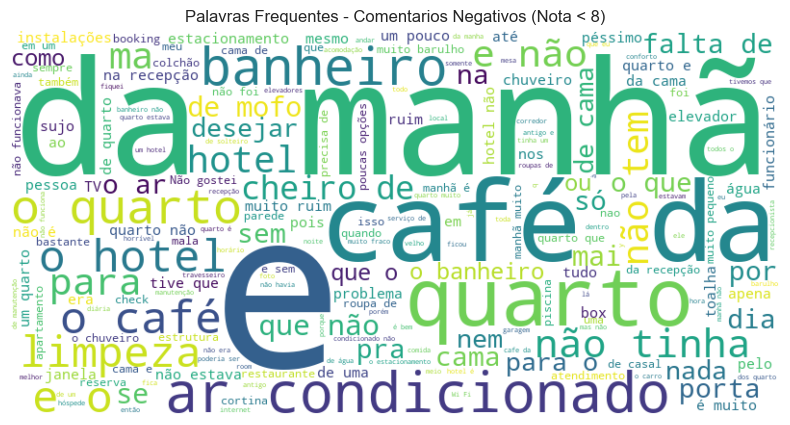

In [48]:
texto_negativo = ' '.join(notas_baixas['comentario_negativo'].dropna().astype(str))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(texto_negativo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Frequentes - Comentarios Negativos (Nota < 8)')
plt.show()

# Comentário:
- Problemas mais recorrentes envolvem: "quarto", "banheiro", "café da manhã", "ar-condicionado" — serviços essenciais.


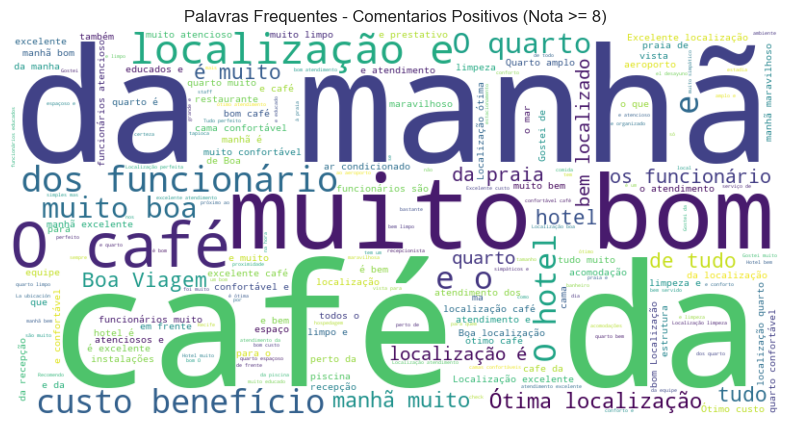

In [49]:
# Comentários positivos (notas altas)
texto_positivo = ' '.join(notas_altas['comentario_positivo'].dropna().astype(str))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_positivo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Frequentes - Comentarios Positivos (Nota >= 8)')
plt.show()

# Comentário:
- Os destaques são "localização", "funcionários", "custo-benefício", além do tradicional "café da manhã".


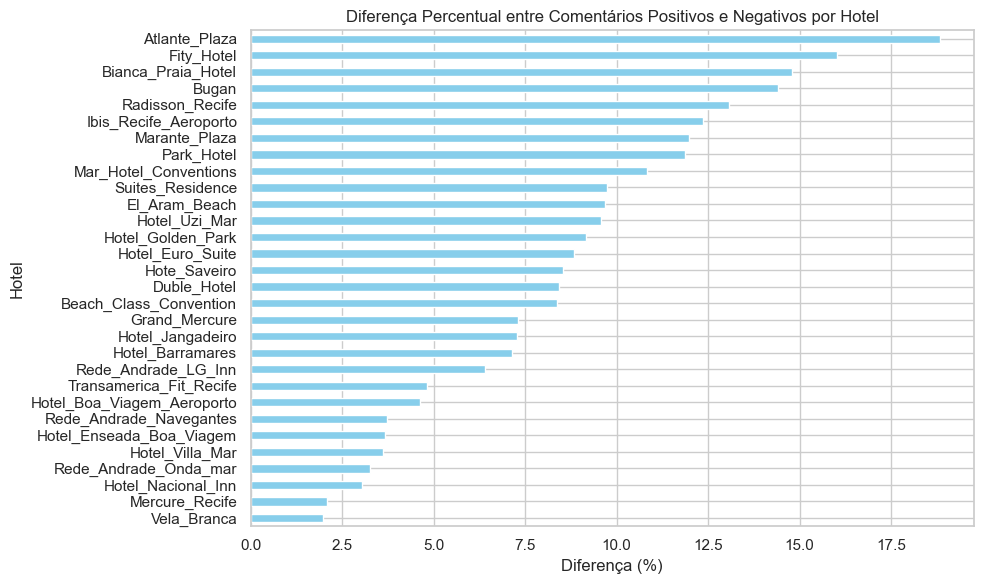

In [50]:
# Agrupamento por hotel: contar quantidade de comentários positivos e negativos
comentarios_por_hotel = data.groupby('hotel')[['comentario_positivo', 'comentario_negativo']].count()
comentarios_por_hotel.columns = ['qtd_positivo', 'qtd_negativo']

# Calcular diferença absoluta e percentual
comentarios_por_hotel['diferenca'] = comentarios_por_hotel['qtd_positivo'] - comentarios_por_hotel['qtd_negativo']
comentarios_por_hotel['total'] = comentarios_por_hotel['qtd_positivo'] + comentarios_por_hotel['qtd_negativo']
comentarios_por_hotel['percentual'] = (comentarios_por_hotel['diferenca'] / comentarios_por_hotel['total']) * 100

# Ordenar por maior diferença percentual
comentarios_ordenado = comentarios_por_hotel.sort_values(by='percentual', ascending=True)

# Plotar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
comentarios_ordenado['percentual'].plot(kind='barh', color='skyblue')
plt.title('Diferença Percentual entre Comentários Positivos e Negativos por Hotel')
plt.xlabel('Diferença (%)')
plt.ylabel('Hotel')
plt.grid(True)
plt.tight_layout()
plt.show()


# A diferença percentual entre elogios e críticas ajuda a identificar não apenas a quantidade, mas a qualidade do engajamento. Hotéis com valores mais altos tendem a proporcionar experiências mais agradáveis e consistentes, enquanto os que se aproximam do zero podem estar gerando dúvidas ou experiências polarizadas.

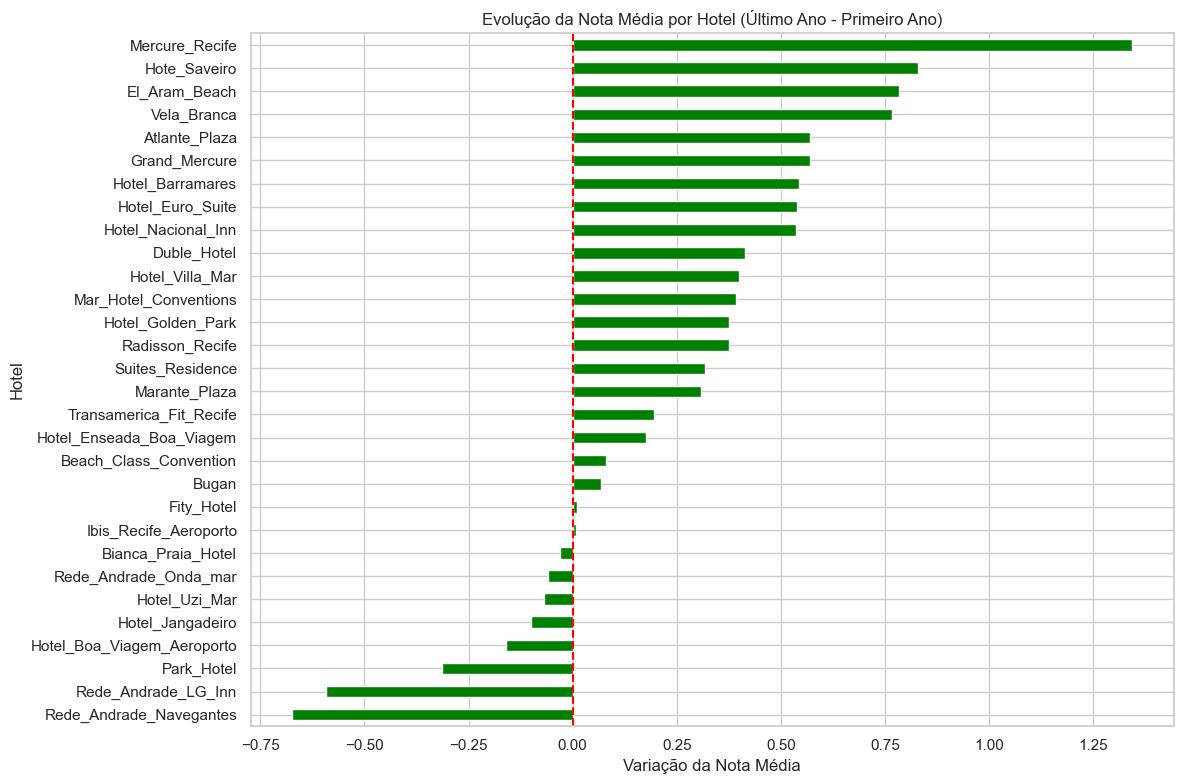

In [51]:
# Extrair o ano
data['ano'] = data['data_avaliacao'].dt.year

# Tabela com a média da nota por hotel e por ano
nota_ano_hotel = data.groupby(['hotel', 'ano'])['nota'].mean().reset_index()

evolucao = nota_ano_hotel.sort_values(by=['hotel', 'ano']).groupby('hotel')['nota'].agg(['first', 'last'])
evolucao['dif'] = evolucao['last'] - evolucao['first']
evolucao = evolucao.sort_values(by='dif')

# Gerar o gráfico
plt.figure(figsize=(12, 8))
evolucao['dif'].sort_values().plot(kind='barh', color='green')
plt.axvline(0, color='red', linestyle='--')  # linha divisora entre quem piorou e quem melhorou
plt.title('Evolução da Nota Média por Hotel (Último Ano - Primeiro Ano)')
plt.xlabel('Variação da Nota Média')
plt.ylabel('Hotel')
plt.grid(True)
plt.tight_layout()
plt.show()


# A evolução das notas ao longo do tempo é indica a capacidade de adaptação e resposta dos hotéis. Hotéis com crescimento nas notas mostram que souberam ouvir e agir, enquanto os que pioraram precisam investigar as causas da insatisfação contínua.

#  Principais conclusões:

- Notas abaixo de 8 predominam sendo um pouco superior a 56%, sugerindo que há espaço para melhorias.
- Hotéis com maior volume de avaliações concentram tanto elogios quanto críticas, sugerindo que visibilidade gera polarização — e não necessariamente excelência.
- O número de comentários positivos ou negativos não se relaciona de maneira significativa com a nota média dos hotéis.
- A classificação do hotel por estrelas influencia significativamente a nota média atribuída pelos hóspedes.
- A percepção de qualidade não está apenas relacionada à quantidade de feedbacks, mas à natureza e ao perfil do hotel.
- Ter mais avaliações não implica em melhor qualidade. Outros fatores podem influenciar 
- A diferença percentual entre comentários positivos e negativos revela quem é bem avaliado de forma e quem divide opiniões — É um bom indicador de reputação quando há polarização


In [52]:
## Análise de palavras mais frequentes nos comentários
import re
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [53]:
#Testar se o NLTK está funcionando corretamente
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TERRA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TERRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
negativo = data['comentario_negativo'].dropna().tolist()
positivo = data['comentario_positivo'].dropna().tolist()

# Stopwords básicas
stop_words = {
    "o", "a", "os", "as", "de", "do", "da", "e", "em", "no", "na", "com", "para",
    "por", "um", "uma", "ao", "à", "que", "é", "foi", "tinha", "muito", "mais",
    "bem", "como", "se", "dos", "das", "nos", "nas", "também", "mas", "não",
    "ser", "ter", "sem", "poderia", "pode", "podia", "fui", "estava", "estive",
    "estar", "só", "porque", "quando", "onde", "sobre", "então", "já", "até",
    "há", "era", "teve", "tive", "isso", "essa", "esse", "aquele", "aquela",
    "meu", "minha", "seu", "sua", "nosso", "nossa", "me", "te", "lhe", "eles", "elas", ","
}

In [55]:
# Corrigindo o erro convertendo explicitamente os comentários para string
def limpar_texto_simples_corrigido(texto):
    texto = str(texto).lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    tokens = texto.split()
    return [token for token in tokens if token not in stop_words]

# Limpar e tokenizar todos os comentários novamente
tokens_negativos = []
tokens_positivos = []

for comentario in negativo:
    tokens_negativos.extend(limpar_texto_simples_corrigido(comentario))

for comentario in positivo:
    tokens_positivos.extend(limpar_texto_simples_corrigido(comentario))

# Contar palavras mais frequentes
frequencia_neg = Counter(tokens_negativos).most_common(20)
frequencia_pos = Counter(tokens_positivos).most_common(20)

df_frequencia_neg = pd.DataFrame(frequencia_neg, columns=["Palavra", "Frequência"])
df_frequencia_pos = pd.DataFrame(frequencia_pos, columns=["Palavra", "Frequência"])

print(df_frequencia_neg)

           Palavra  Frequência
0           quarto        7253
1             café        5648
2            manhã        5038
3            hotel        4486
4         banheiro        3089
5             nada        2620
6             cama        2503
7              tem        2223
8               ar        1843
9   estacionamento        1830
10            tudo        1733
11         limpeza        1591
12           pouco        1583
13    condicionado        1532
14          cheiro        1392
15        recepção        1330
16         quartos        1298
17            ruim        1281
18             pra        1262
19        chuveiro        1229


In [56]:
# Função para encontrar contexto ao redor da expressão "café da manhã"
def extrair_contexto_limpo(frases, janela=3):
    contexto = []
    for frase in frases:
        frase = str(frase).lower()
        tokens = frase.split()
        for i in range(len(tokens)):
            if tokens[i] == "café" and i + 2 < len(tokens) and tokens[i+1] == "da" and tokens[i+2] == "manhã":
                inicio = max(i - janela, 0)
                fim = min(i + 3 + janela, len(tokens))
                palavras_contexto = tokens[inicio:i] + tokens[i+3:fim]
                palavras_contexto = [p for p in palavras_contexto if p not in stop_words]
                contexto.extend(palavras_contexto)
    return Counter(contexto).most_common(20)

# Aplicar análise de contexto nos comentários positivos e negativos
contexto_pos = extrair_contexto_limpo(positivo, janela=3)
contexto_neg = extrair_contexto_limpo(negativo, janela=3)

C:\Users\TERRA\AppData\Local\Temp\ipykernel_20812\3117008369.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="Palavra", data=df_contexto_pos, ax=axs[0], palette="Greens_d")
C:\Users\TERRA\AppData\Local\Temp\ipykernel_20812\3117008369.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="Palavra", data=df_contexto_neg, ax=axs[1], palette="Reds_d")


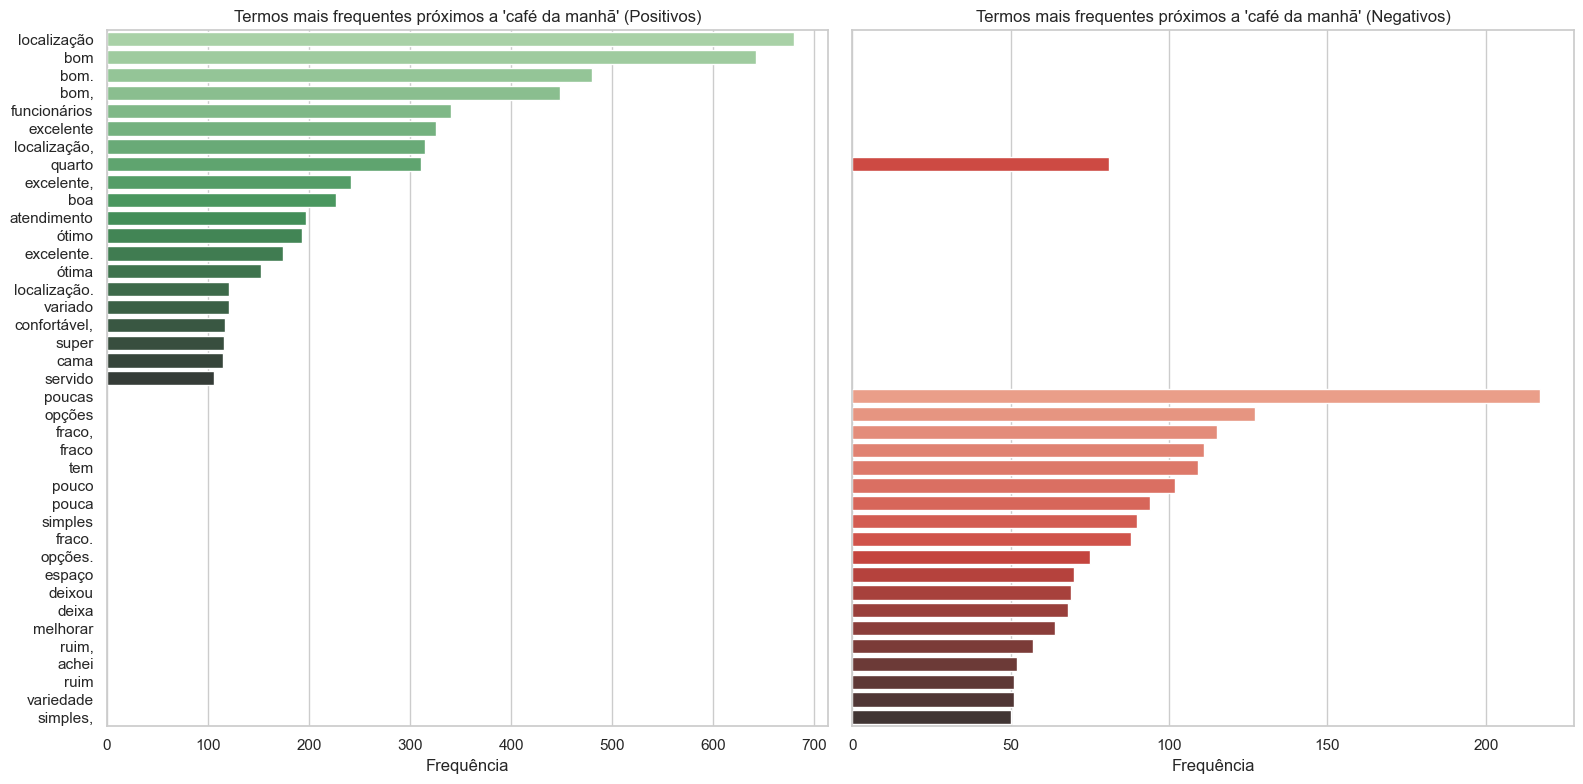

In [57]:
df_contexto_pos = pd.DataFrame(contexto_pos, columns=["Palavra", "Frequência"])
df_contexto_neg = pd.DataFrame(contexto_neg, columns=["Palavra", "Frequência"])

# Visualização lado a lado
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Positivo
sns.barplot(x="Frequência", y="Palavra", data=df_contexto_pos, ax=axs[0], palette="Greens_d")
axs[0].set_title("Termos mais frequentes próximos a 'café da manhã' (Positivos)")
axs[0].set_xlabel("Frequência")
axs[0].set_ylabel("")

# Negativo
sns.barplot(x="Frequência", y="Palavra", data=df_contexto_neg, ax=axs[1], palette="Reds_d")
axs[1].set_title("Termos mais frequentes próximos a 'café da manhã' (Negativos)")
axs[1].set_xlabel("Frequência")
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()

## Avaliação das palavras que mais aparecem para os hoteis que tiveram evolução negativa

C:\Users\TERRA\AppData\Local\Temp\ipykernel_20812\1372835281.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


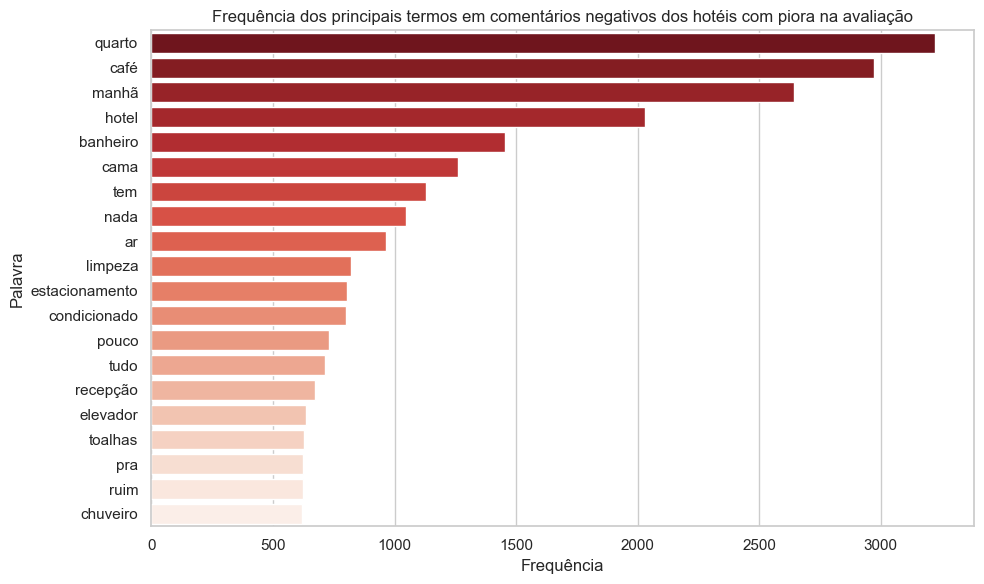

In [61]:
# Lista de hotéis com piora na nota
hoteis_negativos = [
    "Rede_Andrade_Navegantes",
    "Rede_Andrade_LG_Inn",
    "Park_Hotel",
    "Hotel_Boa_Viagem_Aeroporto",
    "Hotel_Jangadeiro",
    "Hotel_Uzi_Mar",
    "Rede_Andrade_Onda_mar",
    "Bianca_Praia_Hotel"
]

# Filtrar apenas os comentários desses hotéis
data_filtro = data[data['hotel'].isin(hoteis_negativos)]
negativo1 = data_filtro['comentario_negativo'].dropna().tolist()

# Limpar e tokenizar comentários
tokens_negativos1 = []

for comentario in negativo1:
    tokens_negativos1.extend(limpar_texto_simples_corrigido(comentario))


# Contar palavras mais frequentes
frequencia_neg1 = Counter(tokens_negativos1).most_common(20)

data_frequencia_neg1 = pd.DataFrame(frequencia_neg1, columns=["Palavra", "Frequência"])

contexto_neg1 = extrair_contexto_limpo(negativo1, janela=3)

data_contexto_neg1 = pd.DataFrame(contexto_neg1, columns=["Palavra", "Frequência"])

# Configura o estilo do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Frequência",
    y="Palavra",
    data=data_frequencia_neg1,
    palette="Reds_r"
)

plt.title("Frequência dos principais termos em comentários negativos dos hotéis com piora na avaliação")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.tight_layout()
plt.show()


In [63]:
# Dicionário para armazenar resultados
termos_por_hotel = {}

# Para cada hotel com piora
for hotel in hoteis_negativos:
    comentarios = data[data['hotel'] == hotel]['comentario_negativo'].dropna().astype(str).tolist()
    
    # Tokenizar e limpar
    tokens = []
    for comentario in comentarios:
        tokens.extend(limpar_texto_simples_corrigido(comentario))
    
    # Contar termos
    frequencia = Counter(tokens).most_common(10)  # top 10 termos
    termos_por_hotel[hotel] = frequencia

# Transformar o dicionário em DataFrame longo
linhas = []
for hotel, termos in termos_por_hotel.items():
    for palavra, freq in termos:
        linhas.append({'Hotel': hotel, 'Palavra': palavra, 'Frequência': freq})

df_termos_hotel = pd.DataFrame(linhas)

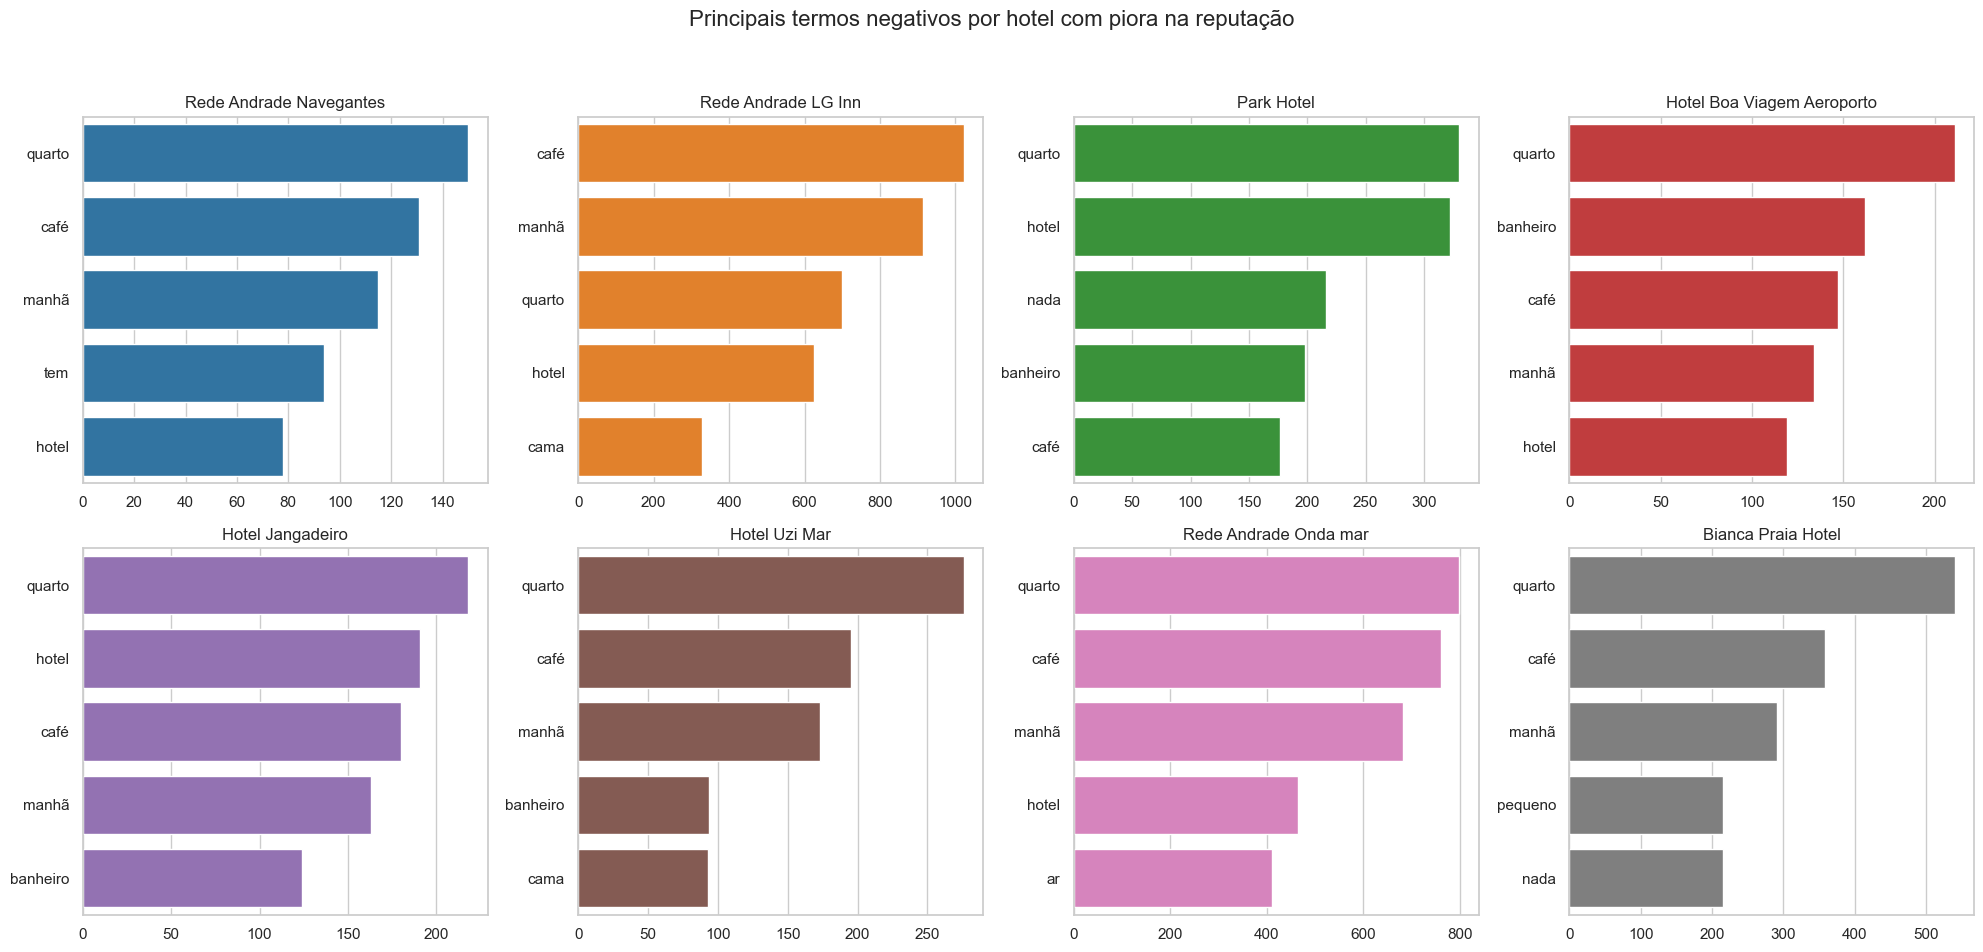

In [67]:
# Paleta de cores personalizada
cores = sns.color_palette("tab10", n_colors=len(hoteis_negativos))

# Layout do gráfico
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Criar subgráficos
for i, hotel in enumerate(hoteis_negativos):
    comentarios = data[data['hotel'] == hotel]['comentario_negativo'].dropna().astype(str).tolist()

    tokens = []
    for comentario in comentarios:
        tokens.extend(limpar_texto_simples_corrigido(comentario))

    frequencia = Counter(tokens).most_common(5)
    df_freq = pd.DataFrame(frequencia, columns=["Palavra", "Frequência"])

    sns.barplot(x="Frequência", y="Palavra", data=df_freq, ax=axes[i], color=cores[i])
    axes[i].set_title(hotel.replace("_", " "))
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remover eixos vazios se sobrar
for j in range(len(hoteis_negativos), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Principais termos negativos por hotel com piora na reputação", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
